In [143]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [144]:
cs = pd.read_csv('Critical_Spped_data.csv')

Our aim is to fit a curve to speed/time data, where given time we can predict speed 

the function for speed considering critical speed 

S = D0/t + CS 

so lets make a function

In [145]:
def S(t,D0,CS):
    return D0/t + CS

In [231]:
guess= [180,6.10]

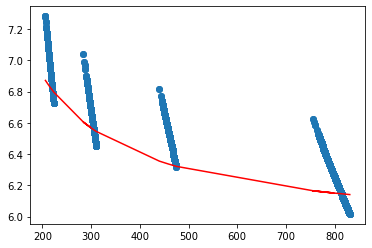

In [147]:

n = len(cs['t_sec'])
y = np.empty(n)

for i in range(n):
    y[i]= S(cs['t_sec'][i],guess[0],guess[1])
    
plt.scatter(cs['t_sec'],cs['Speed'])
plt.plot(cs['t_sec'],y,'r-')

what we have to do is to optimize the guess values 

In [148]:
from scipy.optimize import curve_fit

In [149]:
time = cs['t_sec'].values
s = cs['Speed'].values 
c,cov = curve_fit(S,time,s,guess)
print(c)

[211.50939189   5.90392704]


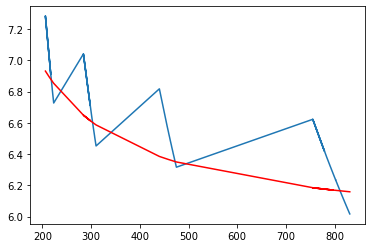

In [150]:
for i in range(n):
    y[i]= S(cs['t_sec'][i],c[0],c[1])
    
plt.plot(cs['t_sec'],cs['Speed'])
plt.plot(cs['t_sec'],y,'r-')


In [151]:
from sklearn.metrics import r2_score

In [152]:
print('r2: ',r2_score(y,s))

r2:  0.8934419111718164


In [153]:
cs['roll_speed'] = cs['Speed'].rolling(100).mean()

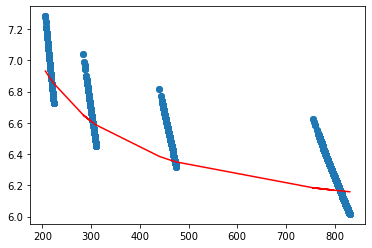

In [154]:
for i in range(n):
    y[i]= S(cs['t_sec'][i],c[0],c[1])
    
plt.scatter(cs['t_sec'],cs['Speed'])
plt.plot(cs['t_sec'],y,'r-')

(5.0, 10.0)

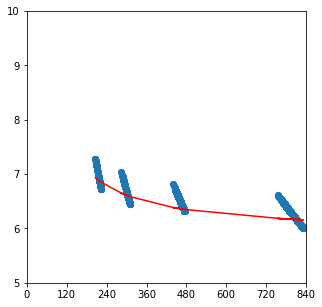

In [161]:
fig,ax = plt.subplots(figsize=(5,5))

for i in range(n):
    y[i]= S(cs['t_sec'][i],c[0],c[1])
    
plt.scatter(cs['t_sec'],cs['Speed'])
plt.plot(cs['t_sec'],y,'r-')
plt.xticks([0,120,240,360,480,600,720,840])
#plt.yticks([0,6,8,10,12,14])

plt.xlim(0,840)
plt.ylim(5,10)



In [156]:
cs.head()

,Rank,Competitor,Date,t_raw,t_sec,Distance,Speed,roll_speed
0,1,Hicham EL GUERROUJ,14 JUL 1998,3:26.00,206,1500,7.281553,NaN
1,2,Bernard LAGAT,24 AUG 2001,3:26.34,206,1500,7.280352,NaN
2,3,Asbel KIPROP,17 JUL 2015,3:26.69,206,1500,7.279115,NaN
3,4,Noureddine MORCELI,12 JUL 1995,3:27.37,207,1500,7.245082,NaN
4,5,Silas KIPLAGAT,18 JUL 2014,3:27.64,207,1500,7.244137,NaN


In [157]:
cs_d = cs[['Distance','Speed','t_sec']]

In [158]:
csd= cs_d.groupby(['Distance']).mean()

In [159]:
csd

,Speed,t_sec
Distance,,
1500,6.857101,218.747482
2000,6.612006,302.526775
3000,6.443866,465.629794
5000,6.144061,813.998023


Text(200, 6.1, 'R-saured= 0.89\nDistance(m) sustained above CS(D*)= 211.51')

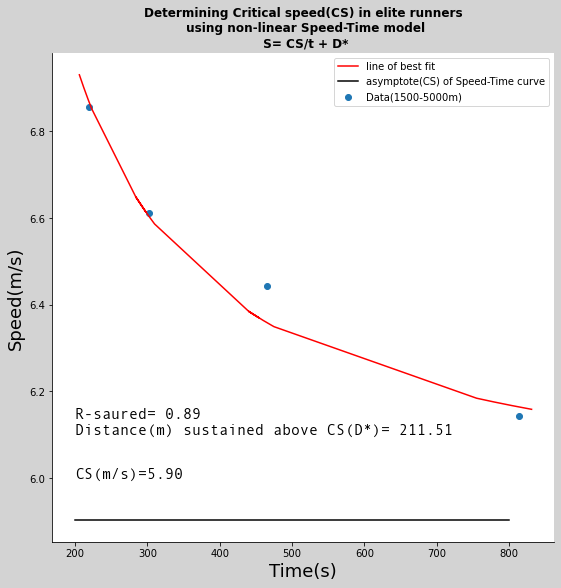

In [256]:
fig,ax = plt.subplots(figsize=(9,9))

fig.set_facecolor('lightgrey') 

for i in range(n):
    y[i]= S(cs['t_sec'][i],c[0],c[1])


plt.scatter(csd['t_sec'],csd['Speed'])
plt.plot(cs['t_sec'],y,'r-')
plt.xlabel('Time(s)',fontsize=18)
plt.ylabel(('Speed(m/s)'),fontsize=18)
plt.title('Determining Critical speed(CS) in elite runners\n using non-linear Speed-Time model\n S= CS/t + D*',fontweight='bold')
#plt.legend(['line of best fit','worl record times(1500-5000)'])


point1=[200,c[1]]
point2=[800,c[1]]

plt.plot([point1[0],point2[0]],[point1[1],point2[1]],'black',label = 'CS')
plt.legend(['line of best fit','asymptote(CS) of Speed-Time curve','Data(1500-5000m)',])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.annotate(xy=(200,6.00),text='CS(m/s)=5.90',fontsize=15,c='black',fontname='Andale Mono')
ax.annotate(xy=(200,6.1),text = 'R-saured= 0.89\nDistance(m) sustained above CS(D*)= 211.51',fontsize=15,fontname='Andale Mono')

#plt.yticks([0,6,8,10,12,14])







